In [1]:
import scipy.io
import numpy as np
from scipy import optimize
mat = scipy.io.loadmat('ex3data1.mat')
X = mat['X']
y = mat['y']
del mat



In [2]:
X.shape

(5000, 400)

note:
X = 400 x 5000
X_img = 5000 x 400 
y = 5000 x 1
m = 5000
theta = 400 x 1
h(theta) = g(theta.T @ x) = 1 x 5000

In [36]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

def cost(theta_val, x_val, y_val,lambd=0):
    count = y_val.shape[0]
    h = sigmoid(theta_val.T @ x_val.T)
    pos_cost = - y_val * np.log(h)
    neg_cost = - (1-y_val) * np.log(1-h)
    theta_x = np.array([i for i in theta_val.flatten()])
    theta_x[0] = 0
    cost_p1 = np.sum(pos_cost + neg_cost)/count
    cost_p2 = lambd/(2*count) * np.sum(theta_x**2)
    return np.array(cost_p1+cost_p2).reshape((1,1))

def grad_cost(theta_val, x_val, y_val,lambd=0):
    count = y_val.shape[0]
    theta_val = theta_val.reshape((-1,1))
    err = sigmoid(theta_val.T @ x_val.T).T-y_val
    theta_x = np.array([i for i in theta_val.flatten()])
    theta_x[0] = 0
    return ((x_val.T @ err)/count).flatten() + (lambd/count) * theta_x

array([ 623, 3913, 1752, 2876, 2998, 2515, 1396, 3495,  957, 1798, 3260,
       2332, 3527,  383, 2065,  205, 1508, 1518,  949, 4389, 2688, 1883,
       1120, 3972, 4616, 2938, 3358, 2635, 3861, 2324, 3425, 1250, 2985,
        657, 4641, 2956,  377,  716, 4045, 2179, 3539, 3648, 4476, 3327,
        530, 1532, 2627,  174,  314, 1149, 3845, 2571, 1078, 3357, 4793,
       4666, 3831, 4776, 3689, 4254, 4347, 2204, 1654, 3963, 4425, 4655,
       2024, 4552, 1610, 1877,  578, 4544, 3735, 2985,  886, 1159,  649,
       2595, 3752, 3628, 4792, 1797,  243, 2196, 4779, 3478, 1333,  933,
       4648, 3936, 2704,  657, 4950, 3490, 4034, 1552, 3297, 1205, 1231,
       2560])

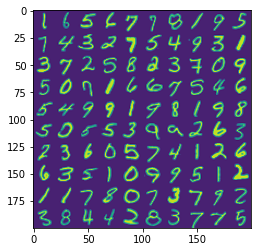

In [179]:
import matplotlib.pyplot as plt
plot_sqr = 10
img = np.zeros((200,200))
img_index = np.random.randint(0,high=X.shape[0],size=plot_sqr**2)
img_tmp = [X[i,:].reshape((20,-1)).T for i in img_index]
for i in range(plot_sqr):
    img[:,i*20:(i+1)*20,] =(np.array(img_tmp[i*10:(i+1)*10]).reshape((-1,20)))
plt.imshow(img)

In [177]:
np.random.randint(0,high=X.shape[0],size=plot_sqr**2)

array([4600, 4703, 1528, 3748, 4862,  985, 4121, 2532, 3290, 4120, 2011,
       4102,  530, 4452, 4155, 4152, 1693, 3695,  851,  786, 1701, 4019,
       3831, 4384, 2632, 2734, 2905, 3984,  565, 1558, 2938,  184, 3504,
       4674, 4744, 1295, 3320, 2765, 2266,  101, 2047, 2368,  432, 3861,
       2301, 3704, 3469, 2868, 3295, 3444, 4554, 4861, 3148, 2649, 3549,
       1363, 2019, 2712, 4925, 2809, 1198, 3046, 2754, 1149, 4943, 2453,
       3424, 2951, 3535, 4519, 3084,   44, 4450, 2360, 2562, 3295, 3398,
       2270,   52,  177,  746, 4434, 2481,   30,  206, 3444, 3899,   82,
        852, 4617, 4751, 3551,  666,  405,  665, 3560, 1015, 1469, 2017,
       4761])

In [132]:
from scipy import optimize
X_a = np.c_[np.array([1]*5000),X]
thetaval = np.array([0]*401*10).reshape(-1,10).astype('float64')
for i in range(10):
    thetainit = np.array([0]*401).reshape(-1,1).astype('float64')
    if i == 0:
        num = 10
    else:
        num = i
    print(f'Training number {num}')
    optimizer = optimize.minimize(fun=cost, x0=thetainit,args = (X_a,(y==num)*1,0), method ='L-BFGS-B', jac=grad_cost)
    print(f'Training number {num} Complete')
    thetaval[:,i] = optimizer.x

Training number 10
Training number 10 Complete
Training number 1
Training number 1 Complete
Training number 2
Training number 2 Complete
Training number 3
Training number 3 Complete
Training number 4
Training number 4 Complete
Training number 5
Training number 5 Complete
Training number 6
Training number 6 Complete
Training number 7
Training number 7 Complete
Training number 8
Training number 8 Complete
Training number 9
Training number 9 Complete


In [180]:
def predict(test_val:int,plot=False):
    if plot:
        plt.imshow(X[test_val].reshape(20,20).T)
    predict_list = sigmoid(thetaval.T @ X_a[test_val,:])
    img_res = np.argmax(predict_list)
    img_conf = np.max(predict_list)*100\
    print(f'The image is {img_res} with confidence of {img_conf:.2f}%')
    return img_res, img_conf


The image is 0 with confidence of 16.73%
2566


IndexError: list index out of range

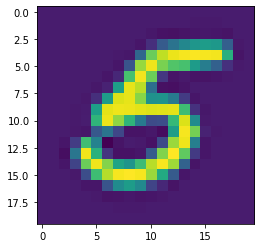

In [184]:
import matplotlib.pyplot as plt
plot_sqr = 10
img = np.zeros((200,200))
img_index = np.random.randint(0,high=X.shape[0],size=plot_sqr**2)
img_tmp = [X[i,:].reshape((20,-1)).T for i in img_index]
for i in range(plot_sqr):
    img[:,i*20:(i+1)*20,] =(np.array(img_tmp[i*10:(i+1)*10]).reshape((-1,20)))
plt.imshow(img)
for i in img_index:
    im_number, im_confident = predict(i)
    print(i)
    print(f'Image at index {img_tmp[i]} is {y[i]}, The estimated image is {im_number} with confidence of {im_confident:.2f}%' )